# Statistical Thinking in Python (Part 1)
- William Surles
- 2017-11-22
- Datacamp class
- [https://www.datacamp.com/courses/statistical-thinking-in-python-part-1](https://www.datacamp.com/courses/statistical-thinking-in-python-part-1)

## Whats covered

- **Graphical exploratory data analysis**
 - Introduction to exploratory data analysis
 - Plotting a histogram
 - Plotting all of your data: Bee swarm plots
 - Plotting all of your data: Empirical cumulative distribution functions
 - Onward toward the whole story  


- **Quantitative exploratory data analysis**
 - Introduction to summary statistics: The sample mean and median
 - Percentiles, outliers, and box plots
 - Variance and standard deviation
 - Covariance and Pearson correlation coefficient  


- **Thinking probabillistically - Discrete variables**
 - Probabilistic logic and statistical inference
 - Random number generators and hacker statistics
 - Probability distributions and stories: The Binomial distribution
 - Poisson processes and the Poisson distribution  


- **Thinking probabillistically - Continuous variables**
 - Probability density functions
 - Introduction to the Normal distribution
 - The Normal distribution: Properties and warnings
 - The Exponential distribution
 - Final thoughts and encouragement toward Statistical Thinking II

## Additional Resources

- [matplotlib styles](https://matplotlib.org/api/pyplot_api.html)

## Libraries and Data

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Graphical exploratory data analysis

## Introduction to exploratory data analysis

#### Exporatory data analysis
 - the process of organizing, plotting, and summarizing a data set
 - Developed by one of the 'greatest statisticians of all time' John Tukey
 - He wrote a book 'Exploratory data analysis' in 1977 (dang)
 - "Exploratory data analysis can never be the whole story, but nothing else can serve as the foundation stone." - Tukey

### Tukey's comments on EDA

Tukey's quotes about EDA:
 - Exploratory data analysis is detective work.
 - There is no excuse for failing to plot and look.
 - The greatest value of a picture is that it forces us to notice what we never expected to see.
 - It is important to understand what you can do before you learn how to measure how well you seem to have done it.

### Advantages of graphical EDA

True statements about graphical EDA:
- It often involves converting tabular data into graphical form.
- If done well, graphical representations can allow for more rapid interpretation of data.
- There is no excuse for neglecting to do graphical EDA.

## Plotting a histogram

- Using `_` when creating a hist will prevent extra output
 - `_ = plt.hist(data)`
 - `_ = plt.xlabel('whatever')`
- Always label you axes, and use units too!
- The the number of `bins` or `bin_edges` so that the bars line up in an interpretable way.
- matplotlib is a common base plotting library, but the instructor prefers to style things with seaborn (mee too!)
 - `import seaborn as sns`
 - `sns.set()`

### Plotting a histogram of iris data

#### Load the data

In [7]:
from sklearn.datasets import load_iris
iris_kit = load_iris()
iris = pd.DataFrame(data= np.c_[iris_kit['data'], iris_kit['target']],
                     columns= iris_kit['feature_names'] + ['species'])
iris['species'] = iris['species'].replace({0:'setosa', 1:'versicolor', 2:'virginica'})
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [9]:
versicolor_petal_length = iris.loc[iris.species == 'versicolor']['petal length (cm)']
versicolor_petal_length.head()

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
Name: petal length (cm), dtype: float64

#### Exercise

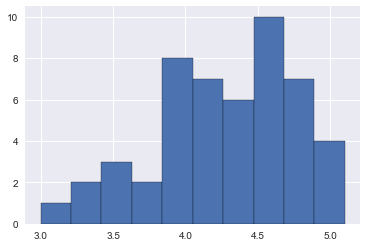

In [11]:
# Import plotting modules
import matplotlib.pyplot as plt
import seaborn as sns

# Set default Seaborn style
sns.set()

# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length, edgecolor='black')

# Show histogram
plt.show()

### Axis labels!

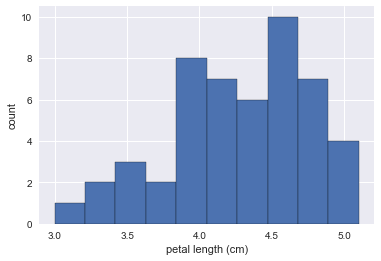

In [14]:
# Plot histogram of versicolor petal lengths
_ = plt.hist(versicolor_petal_length, edgecolor='black')

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')


# Show histogram
plt.show()

### Adjusting the number of bins in a histogram
- The histogram you just made had ten bins. This is the default of matplotlib. 
- The "square root rule" is a commonly-used rule of thumb for choosing number of bins: 

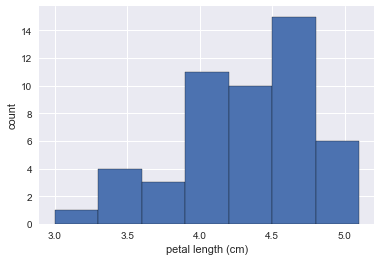

In [16]:
# Import numpy
import numpy as np

# Compute number of data points: n_data
n_data = len(versicolor_petal_length)

# Number of bins is the square root of number of data points: n_bins
n_bins = np.sqrt(n_data)

# Convert number of bins to integer: n_bins
n_bins = int(n_bins)

# Plot the histogram
_ = plt.hist(versicolor_petal_length, bins=n_bins, edgecolor='black')

# Label axes
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('count')

# Show histogram
plt.show()


## Plotting all of your data: Bee swarm plots

- One drawback of histograms is that the data can look different based on how bins are chosen
- And choice of bins is arbitrary
- This can lead to 'binning bias'
- Also we are not plotting all of the data. We sweep it into bins. Sometimes its helpful to see all data points
- A bee swarm plot is a good wa to plot all of the data for one variable
 - We can also split data by a category if we want

### Bee swarm plot

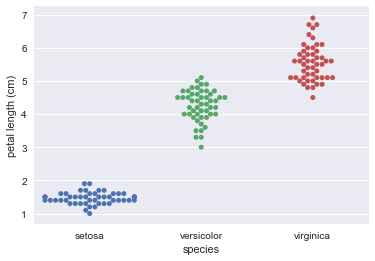

In [17]:
# Create bee swarm plot with Seaborn's default settings
sns.swarmplot(x = 'species', y = 'petal length (cm)', data = iris)

# Label the axes
plt.xlabel('species')
plt.ylabel('petal length (cm)')

# Show the plot
plt.show()


### Interpreting a bee swarm plot

- We can say that virginica petals tend to be the longest and setosa the shortest.

## Plotting all of your data: Empirical cumulative distribution functions

- Its possible for a bee swarm plot to loose efficacy if there is to much data
 - In order to plot all the points it will begin to overlap points on the edges
 - this obfuscates the data
- An Emperical cumulative distribution function (ECDF) is a good way to plot a distribution when there are many datapoints
 - This lets us see the percentage of points that lie below all values in the data dataset
 - The x data is simply all values sorted
 - The y axis is evenly spaced data points from 0 to 1. These represent percentages.
 - We will make as many points as there are data points in the dataset
- The instructor almost always plots the ECDF first
 - It plots all of the data and gives a good picture of how the data is distributed

### Computing the ECDF

In [18]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

### Plotting the ECDF

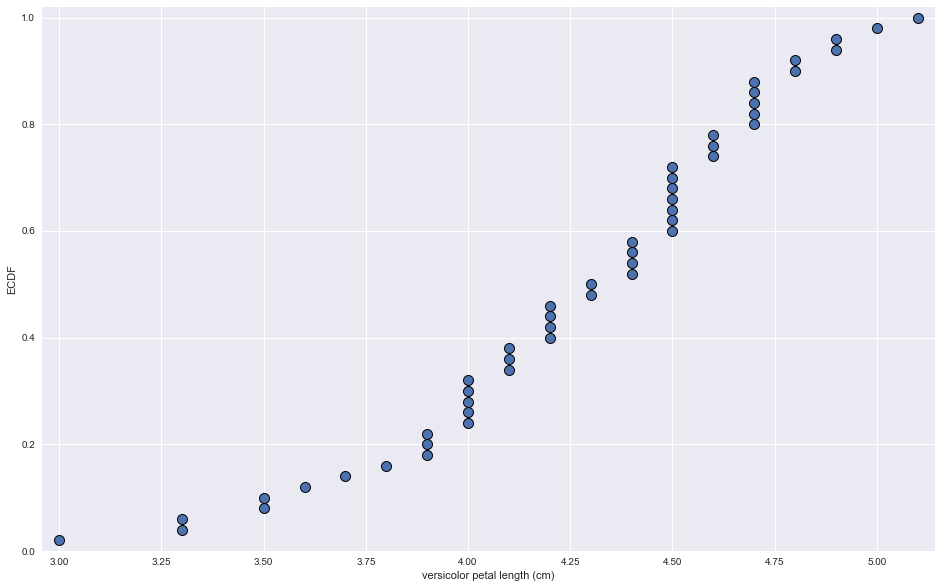

In [65]:
# Compute ECDF for versicolor data: x_vers, y_vers
x_vers, y_vers = ecdf(iris['petal length (cm)'][iris.species == 'versicolor'])

plt.figure(figsize=(16,10))

# Generate plot
plt.plot(
    x_vers, y_vers,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

# Make the margins nice
plt.margins(0.02)

# Label the axes
plt.xlabel('versicolor petal length (cm)')
plt.ylabel('ECDF')

# Display the plot
plt.show()



### Comparison of ECDFs

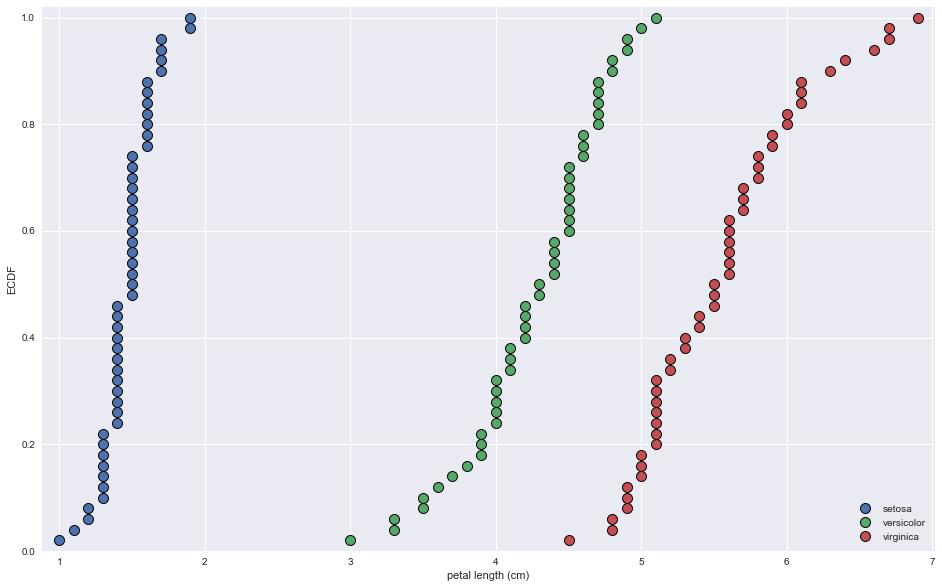

In [67]:
# Compute ECDFs
x_set, y_set = ecdf(iris['petal length (cm)'][iris.species == 'setosa'])
x_vers, y_vers = ecdf(iris['petal length (cm)'][iris.species == 'versicolor'])
x_virg, y_virg = ecdf(iris['petal length (cm)'][iris.species == 'virginica'])

# Plot all ECDFs on the same plot
plt.figure(figsize=(16,10))

plt.plot(
    x_set, y_set,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

plt.plot(
    x_vers, y_vers,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

plt.plot(
    x_virg, y_virg,
    marker = 'o',
    markersize = 10,
    markeredgecolor='black',
    markeredgewidth=1,
    linestyle = 'none')

# Make nice margins
plt.margins(0.02)

# Annotate the plot
plt.legend(('setosa', 'versicolor', 'virginica'), loc='lower right')
_ = plt.xlabel('petal length (cm)')
_ = plt.ylabel('ECDF')

# Display the plot
plt.show()

# Quantitative exploratory data analysis

## Introduction to summary statistics: The sample mean and median

### Means and medians

### Computing means

## Percentiles, outliers, and box plots

### Computing percentiles

### Comparing percentiles to ECDF

### Box-and-whisker plot

## Variance and standard deviation

### Computing the variance

### The standard deviation and the variance

## Covariance and Pearson correlation coefficient

### Scatter plots

### Variance and covariance by looking

### Computing the covariance

### Computing the Pearson correlation coefficient

# Thinking probabilistically -- Discrete variables

## Probabilistic logic and statistical inference

### What is the goal of statistical inference?

### Why do we use the language of probability?

## Random number generators and hacker statistics

### Generating random numbers using the np.random module

### The np.random module and Bernoulli trials

### How many defaults might we expect?

### Will the bank fail?

## Probability distributions and stories: The Binomial distribution

### Sampling out of the Binomial distribution

### Plotting the Binomial PMF

## Poisson processes and the Poisson distribution

### Relationship between Binomial and Poisson distributions

### How many no-hitters in a season?

### Was 2015 anomalous?

# Thinking probabilistically -- Continuous variable

## Probability density functions

### Interpreting PDFs

### Interpreting CDFs

## Introduction to the Normal distribution

### The Normal PDF

### The Normal CDF

## The Normal distribution: Properties and warnings

### Gauss and the 10 Deutschmark banknote

### Are the Belmont Stakes results Normally distributed?

### What are the chances of a horse matching or beating Secretariat's record?

## The Exponential distribution

### Matching a story and a distribution

### Waiting for the next Secretariat

### If you have a story, you can simulate it!

### Distribution of no-hitters and cycles

## Final thoughts and encouragement toward Statistical Thinking II